# Basic Libraries

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import math
import random

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

# provider = IBMQ.get_provider(hub='ibm-q')
# machine = provider.get_backend('ibmq_valencia')
from qiskit.test.mock import FakeLondon
machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\Eesh Gupta\anacondaaa\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Important Functions

In [2]:
#Local Hamiltonian Function
from VQEHamiltonian_funcs import circs, Hammifier

#Readout Mit Functions
#from ReadoutMit import prepare_circuit, modify_counts, symmetry

# Expectation Value/Running Functions
from Result_ReadoutMit3 import binaryToDecimal, dictToList, sampleExpecVal, countToEig, expecValForSamples, addDicts, prepare_circuit_normal, prepare_circuit, modify_counts, symmetry, evaluator

# Noise Model

In [3]:
'''

def generateDepolarizingError(machine, gate, qubits)

def generateRelaxationError(machine, gate, qubits, t1, t2, amp = 1, custom_t = False):
    """
    Return a relaxation error
    """

def generateNoiseModel(machine, coherent = True, incoherent = False, readout = False, custom_t = False, t1 = None, t2 = None, reverse = False):
    """
    Returns a realistic copy of london noise model with custom t1, t2 times
    """

'''

from NoiseModel import generateDepolarizingError, generateRelaxationError, generateNoiseModel

In [4]:
 noise_model = generateNoiseModel(machine, coherent = False, incoherent = False, readout= True)

Original: 0.01 0.050000000000000044
Reverse: 0.01 0.050000000000000044
Original: 0.02 0.07666666666666666
Reverse: 0.02 0.07666666666666666
Original: 0.14 0.18999999999999995
Reverse: 0.14 0.18999999999999995
Original: 0.0033333333333332993 0.03
Reverse: 0.0033333333333332993 0.03
Original: 0.006666666666666667 0.043333333333333335
Reverse: 0.006666666666666667 0.043333333333333335


# Variational Form
For Hydrogen

In [5]:
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock

initial_state = HartreeFock(
4,
2,
'parity'
) 
var_form = UCCSD(
            num_orbitals=4,
            num_particles=2,
            initial_state=initial_state,
            qubit_mapping='parity'
        )

# Running Circuits for different Param

In [6]:
counter = 0

def EnergyFinder(param):
    '''
    Input: param (1D array) for which to compute energy on VQE circ of H2
    Output: energy
    '''
    
    Hamiltonian = """II\nIZ\nZI\nZZ\nXX"""
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    backend = simulator
    global noise_model
    samples = 8192
    
    
    
    circ = var_form.construct_circuit(param).decompose()
    circuits = Hammifier(circ, Hamiltonian)
    circs_nr = circs(circuits)
    circs_r = circs(circuits)
    circs_ideal = circs(circuits)
    #print('no mit')
    noisy_r = evaluator(circs_r, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = False)
    #print('mit')
    noisy_nr = evaluator(circs_nr, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = True)
    #print('no mit')
    ideal = evaluator(circs_ideal, samples, None, Hamiltonian, Hamiltonian_weights, simulator, False)
    #print('done')
    return noisy_r, noisy_nr, ideal

def main():
    '''
    Choose param and compute mean
    '''
    d = -math.pi
    u = math.pi
    
    energies = []
    diff_r = []
    diff_nr = []
    params = []
    
    for i in range(1000):
        print(i)
    
        p1 = random.uniform(d, u)
        p2 = random.uniform(d, u)
        p3 = random.uniform(d, u)


        noisy_r,noisy_nr, ideal = EnergyFinder([p1,p2,p3])
        energies.append([[p1,p2,p3], ideal, noisy_r, noisy_nr])
        diff_r.append(noisy_r-ideal)
        diff_nr.append(noisy_nr-ideal)
        
        print('Noisy diff is ' + str(noisy_r-ideal))
        print('Mitigated diff is ' + str(noisy_nr-ideal))
        
    return energies, diff_r, diff_nr
energies, diff_r, diff_nr = main()

0
Noisy diff is -0.021949462890625007
Mitigated diff is 0.01667032769282728
1
Noisy diff is -0.05614477539062496
Mitigated diff is 0.011266769390548714
2
Noisy diff is 0.03490380859374986
Mitigated diff is 0.029379696442880077
3
Noisy diff is -0.011666259765624964
Mitigated diff is 0.01706568977820859
4
Noisy diff is 0.007094726562500042
Mitigated diff is 0.016734610316983367
5
Noisy diff is -0.030634521484374982
Mitigated diff is 0.020099152870783746
6
Noisy diff is 0.03351757812500006
Mitigated diff is 0.04356630727004218
7
Noisy diff is 0.039813232421874956
Mitigated diff is -0.0004950687767094619
8
Noisy diff is -0.03560131835937501
Mitigated diff is -7.6306495154152e-05
9
Noisy diff is -0.028494140625
Mitigated diff is 0.025444371291685752
10
Noisy diff is 0.05048291015624995
Mitigated diff is 0.02905019097765482
11
Noisy diff is -0.021245361328125045
Mitigated diff is 0.018826292111798204
12
Noisy diff is 0.008221435546874989
Mitigated diff is 0.00031746079441391517
13
Noisy diff

Noisy diff is 0.017714111328125004
Mitigated diff is 0.013230199986645319
108
Noisy diff is 0.004853759765624965
Mitigated diff is 0.013821063967883934
109
Noisy diff is -0.0028405761718749423
Mitigated diff is 0.002088655513493687
110
Noisy diff is -0.007399902343749987
Mitigated diff is 0.014625992423143885
111
Noisy diff is -0.045127441406249996
Mitigated diff is 0.0032918449280754103
112
Noisy diff is 0.034001464843749996
Mitigated diff is 0.0034561981909151385
113
Noisy diff is 0.049833007812499885
Mitigated diff is 0.02173444145371284
114
Noisy diff is -0.014778076171874988
Mitigated diff is 0.002939828070150363
115
Noisy diff is -0.05906054687499995
Mitigated diff is 0.018592512362954505
116
Noisy diff is -0.004562988281249958
Mitigated diff is 0.020794946080395338
117
Noisy diff is -0.016143554687500006
Mitigated diff is 0.014125411134004895
118
Noisy diff is -0.026156005859375026
Mitigated diff is 0.025618165433741596
119
Noisy diff is 0.05700976562499993
Mitigated diff is 0.0

Noisy diff is -0.012519531249999993
Mitigated diff is -0.004613777281746001
213
Noisy diff is -0.05278588867187495
Mitigated diff is 0.018611087084573374
214
Noisy diff is -0.029180175781250012
Mitigated diff is 0.012225244486458592
215
Noisy diff is -0.007840820312499885
Mitigated diff is 0.00593943833943833
216
Noisy diff is 0.03630834960937501
Mitigated diff is 0.022459391335660883
217
Noisy diff is -0.008046142578125026
Mitigated diff is 0.04008137955252211
218
Noisy diff is 0.009946044921875008
Mitigated diff is -0.006552416008470563
219
Noisy diff is -0.027869628906250027
Mitigated diff is 0.031602934993608806
220
Noisy diff is 0.016252929687500084
Mitigated diff is 0.00430943235367065
221
Noisy diff is 0.0005051269531249902
Mitigated diff is 0.003026588553590448
222
Noisy diff is 0.02062939453125001
Mitigated diff is 0.019905169031532388
223
Noisy diff is 0.015399658203124944
Mitigated diff is 0.002847853643464182
224
Noisy diff is 0.022044433593749968
Mitigated diff is 0.005259

Noisy diff is -0.01678149414062502
Mitigated diff is 0.027804451200257152
318
Noisy diff is -0.013310058593750007
Mitigated diff is 0.011293364740728035
319
Noisy diff is 0.04184594726562518
Mitigated diff is 0.007520961812709892
320
Noisy diff is -0.0016257324218749702
Mitigated diff is 0.010569210379464289
321
Noisy diff is 0.015195068359375064
Mitigated diff is 0.02637576962879895
322
Noisy diff is -0.04234252929687496
Mitigated diff is 0.01908830819787849
323
Noisy diff is 0.04111083984374997
Mitigated diff is 0.02326750938406208
324
Noisy diff is -0.008984130859374995
Mitigated diff is 0.01856957173143703
325
Noisy diff is -0.030370849609374997
Mitigated diff is 0.016788200525602873
326
Noisy diff is -0.04027514648437498
Mitigated diff is 0.010271286087138634
327
Noisy diff is -0.02631542968749999
Mitigated diff is 0.02107880357916298
328
Noisy diff is 0.007208496093749961
Mitigated diff is 0.022414115739945673
329
Noisy diff is -0.020133544921874996
Mitigated diff is 0.0212531115

Noisy diff is -0.010494140624999995
Mitigated diff is 0.014097851198778471
424
Noisy diff is 0.01724389648437502
Mitigated diff is 0.008114468029800093
425
Noisy diff is 0.002765869140625002
Mitigated diff is -0.0006084709940666899
426
Noisy diff is 0.01849145507812494
Mitigated diff is 0.03704195876685756
427
Noisy diff is 0.03007666015624999
Mitigated diff is 0.02450913860987103
428
Noisy diff is -0.010467529296875
Mitigated diff is 0.03871977604643623
429
Noisy diff is 0.046601806640624965
Mitigated diff is 0.027686814259958892
430
Noisy diff is -0.020875976562500006
Mitigated diff is 0.017885084706959712
431
Noisy diff is -0.024903320312500005
Mitigated diff is 0.019236713563129587
432
Noisy diff is 0.01911987304687507
Mitigated diff is 0.017344716217305656
433
Noisy diff is 0.022563476562500018
Mitigated diff is 0.0299917212778541
434
Noisy diff is -0.005797119140625001
Mitigated diff is 0.022955443829174305
435
Noisy diff is -0.019483154296875
Mitigated diff is 0.0276646396138583

Noisy diff is -0.010010742187500032
Mitigated diff is 0.010397357319329947
530
Noisy diff is -0.03709033203124999
Mitigated diff is 0.019490833130628056
531
Noisy diff is -0.004863525390624901
Mitigated diff is 0.011989628703544752
532
Noisy diff is -0.013060302734374918
Mitigated diff is 0.019255646381604152
533
Noisy diff is -0.0006293945312499938
Mitigated diff is 0.0025581375399638118
534
Noisy diff is 0.02725195312500006
Mitigated diff is 0.033535983108688217
535
Noisy diff is 0.012001953124999964
Mitigated diff is 4.41417577647929e-05
536
Noisy diff is 0.010447753906250024
Mitigated diff is 0.029816821497729684
537
Noisy diff is -0.0006118164062499654
Mitigated diff is 0.01657041379302121
538
Noisy diff is 0.02622802734375007
Mitigated diff is 0.027089620478643384
539
Noisy diff is -0.02194921874999997
Mitigated diff is 0.014277518195779909
540
Noisy diff is -0.011252441406250036
Mitigated diff is 0.02208380426539608
541
Noisy diff is 0.03150122070312489
Mitigated diff is 0.00175

Noisy diff is -0.056740478515624915
Mitigated diff is 0.026614356661133987
636
Noisy diff is 0.0041025390625000074
Mitigated diff is 0.006400006200396838
637
Noisy diff is 0.009677734374999969
Mitigated diff is 0.0012508124308416857
638
Noisy diff is 0.012311035156250011
Mitigated diff is 0.010496828050109153
639
Noisy diff is -0.014514160156250011
Mitigated diff is 0.008702983523637853
640
Noisy diff is -0.0064562988281249845
Mitigated diff is 0.027601427879845847
641
Noisy diff is -0.011482177734374988
Mitigated diff is -0.00032670544256196976
642
Noisy diff is -0.015292968749999969
Mitigated diff is 0.030554474275705235
643
Noisy diff is -0.0006030273437500344
Mitigated diff is 0.019770953048687423
644
Noisy diff is 0.023090087890625055
Mitigated diff is 0.015129418140453321
645
Noisy diff is -0.009498779296874926
Mitigated diff is 0.005152608014562299
646
Noisy diff is -0.014893066406249988
Mitigated diff is 0.02969314909808074
647
Noisy diff is -0.026779296875000025
Mitigated diff

Noisy diff is -0.008786621093749947
Mitigated diff is 0.010902503589075907
741
Noisy diff is -0.004503906250000078
Mitigated diff is 0.028349058277252592
742
Noisy diff is 0.017919433593749978
Mitigated diff is 0.01529058398199018
743
Noisy diff is -0.00277197265625001
Mitigated diff is 0.03574482290712755
744
Noisy diff is -0.022862548828124996
Mitigated diff is 0.03877896956559067
745
Noisy diff is 0.02830029296875003
Mitigated diff is 0.02906959820236199
746
Noisy diff is -0.009806640625000002
Mitigated diff is 0.0022257627896415944
747
Noisy diff is -0.009204589843749944
Mitigated diff is 0.0037312990666018564
748
Noisy diff is 0.015869140625
Mitigated diff is 0.028817025798947127
749
Noisy diff is -0.013199951171875002
Mitigated diff is 0.011462490460927954
750
Noisy diff is -0.0037946777343749183
Mitigated diff is 0.037895840904971834
751
Noisy diff is 0.0053481445312499876
Mitigated diff is 0.023138533064553046
752
Noisy diff is 0.04524072265625001
Mitigated diff is 0.0051518278

Noisy diff is -0.007858886718750013
Mitigated diff is 0.001441830679086542
847
Noisy diff is -0.05705688476562501
Mitigated diff is 0.01198401115863637
848
Noisy diff is -0.051069824218749976
Mitigated diff is 0.03410088856456045
849
Noisy diff is 0.02550952148437491
Mitigated diff is 0.025745851457570246
850
Noisy diff is -0.027908447265624997
Mitigated diff is 0.025705164632459587
851
Noisy diff is -0.04970825195312502
Mitigated diff is 0.01528084882240155
852
Noisy diff is -0.010876708984374983
Mitigated diff is 0.031139063632764807
853
Noisy diff is -0.0230498046875
Mitigated diff is 0.004670277904715928
854
Noisy diff is -0.010639892578125032
Mitigated diff is -0.0031432608840812337
855
Noisy diff is -0.021845947265625006
Mitigated diff is 0.003523054280608888
856
Noisy diff is -0.03427270507812501
Mitigated diff is 0.0329537123506476
857
Noisy diff is 0.0029140625000000364
Mitigated diff is 0.015954069960465278
858
Noisy diff is -0.019223388671874952
Mitigated diff is 0.008194119

Noisy diff is 0.020069824218750032
Mitigated diff is 0.007632954274458148
953
Noisy diff is -0.006787353515624983
Mitigated diff is 0.013158975367638659
954
Noisy diff is -0.022394531250000002
Mitigated diff is 0.011705362925919574
955
Noisy diff is 0.02519750976562496
Mitigated diff is 0.031294085834954966
956
Noisy diff is -0.015520507812499973
Mitigated diff is -0.012183898500942564
957
Noisy diff is 0.0320053710937499
Mitigated diff is -0.005330506809582691
958
Noisy diff is -0.004918701171874984
Mitigated diff is 0.003637485009902769
959
Noisy diff is -0.02020141601562503
Mitigated diff is 0.026512213321843725
960
Noisy diff is 0.007567382812500023
Mitigated diff is 0.005624033514375237
961
Noisy diff is 0.0029133300781249982
Mitigated diff is 0.033333788979022935
962
Noisy diff is 0.03932934570312496
Mitigated diff is 0.03024927747491224
963
Noisy diff is 0.029392822265625007
Mitigated diff is 0.01736311513062494
964
Noisy diff is 0.004519287109374992
Mitigated diff is 0.01913059

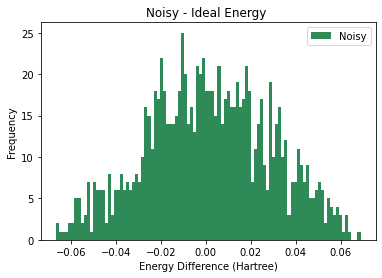

In [7]:
import numpy as np
import matplotlib.pyplot as plt

a = plt.figure()
plt.hist(diff_r, bins=100, color = "seagreen", label = 'Noisy')
#plt.hist(diff_nr, bins=100, color = "lightcoral", label = 'Mitigated')
plt.title("Noisy - Ideal Energy ")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_noisy_3.png', dpi = 1000)

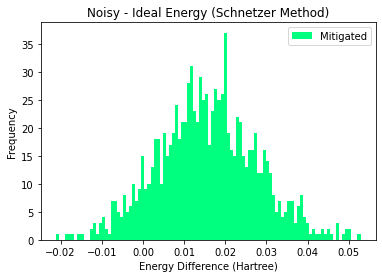

In [8]:
a = plt.figure()
#plt.hist(diff_r, bins=100, color = "red", label = 'Noisy')
plt.hist(diff_nr, bins=100, color = "springgreen", label = 'Mitigated')
plt.title("Noisy - Ideal Energy (Schnetzer Method)")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_Mitigated_3.png', dpi = 1000)

In [9]:
energies

[[[-2.7999006257017447, 2.2732158886637484, -1.8084675263471692],
  -0.12479116873141873,
  -0.14674063162204373,
  -0.10812084103859144],
 [[0.06918839443212432, 2.939796881205938, 1.589026739450147],
  0.3575249933779562,
  0.3013802179873312,
  0.3687917627685049],
 [[1.05088270741743, 0.6924783124230296, 1.6963602846604724],
  -0.6590387273251688,
  -0.6241349187314189,
  -0.6296590308822887],
 [[-0.7588633841561703, 0.3280703418999038, -0.932322248184438],
  -0.13025112966891883,
  -0.1419173894345438,
  -0.11318543989071024],
 [[-1.2765025864055104, -0.3471884845870634, 1.7371827309607157],
  -0.30066641287204376,
  -0.2935716863095437,
  -0.2839318025550604],
 [[0.3244630718006585, 2.399802131844214, 1.9726653085260937],
  -0.09686465505954384,
  -0.12749917654391882,
  -0.07676550218876009],
 [[2.2593147547900934, -2.5397250692131315, -2.1419122613886543],
  -0.5290655827939187,
  -0.49554800466891863,
  -0.4854992755238765],
 [[-1.1114798920595703, -1.5119683157359145, -1.6210

In [10]:
diff_r

[-0.021949462890625007,
 -0.05614477539062496,
 0.03490380859374986,
 -0.011666259765624964,
 0.007094726562500042,
 -0.030634521484374982,
 0.03351757812500006,
 0.039813232421874956,
 -0.03560131835937501,
 -0.028494140625,
 0.05048291015624995,
 -0.021245361328125045,
 0.008221435546874989,
 -0.0030651855468750155,
 0.015812988281249996,
 0.012594482421874886,
 0.010515625000000028,
 0.011337158203124975,
 0.06239892578125006,
 0.01485351562499998,
 -0.019146728515624996,
 -0.007622558593750009,
 -0.020441162109374966,
 0.005647216796875076,
 0.022812500000000013,
 0.013195312499999945,
 -0.019468017578124996,
 -0.056136718749999925,
 -0.015811035156250014,
 -0.022057861328124997,
 -0.008837646484374989,
 0.054671142578125,
 0.005159179687499904,
 0.00938989257812517,
 -0.025924804687500004,
 0.008025146484375023,
 0.01438256835937507,
 0.013360595703124922,
 0.022383789062500048,
 -0.0001193847656250635,
 -0.005936767578124946,
 0.029381103515625062,
 0.04909155273437493,
 0.036358

In [11]:
diff_nr

[0.01667032769282728,
 0.011266769390548714,
 0.029379696442880077,
 0.01706568977820859,
 0.016734610316983367,
 0.020099152870783746,
 0.04356630727004218,
 -0.0004950687767094619,
 -7.6306495154152e-05,
 0.025444371291685752,
 0.02905019097765482,
 0.018826292111798204,
 0.00031746079441391517,
 0.019582220898675978,
 0.016374822811736855,
 0.00976486121842568,
 0.027152203359451343,
 0.013298342526613938,
 0.017842411727812202,
 0.03575187651432768,
 -0.00010301067814866283,
 -0.0008226028908157879,
 0.005876768998427762,
 0.005043649541647599,
 0.0196441391345199,
 0.005720313138003308,
 0.0005761848719856508,
 0.00820275695554823,
 0.02768475596668954,
 0.01960885780343789,
 0.04388134080004198,
 0.0076322536296171695,
 0.031041700411133966,
 -0.0025904970571962727,
 -0.01575886340764271,
 0.008328956687843447,
 0.010599929449948142,
 0.018194879850256362,
 0.015803997134335723,
 0.011881829975579905,
 0.024797974989314964,
 -0.008250442553323412,
 0.039309188941529905,
 0.003865

# Without Readout